<a href="https://colab.research.google.com/github/pietrodileo/Python_for_MD_thesis/blob/main/ImportImageDatastore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creiamo un datastore di immagini che possa essere usato come training set per addestrare una CNN

1. Carichiamo le librerie e il path da cui prendere le immagini

In [27]:
#importing the libraries
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pdb
# to set a breakpoint
#pdb.set_trace(), (type h for help, s "step", "c" continue until next breakpoint, q "quit") 
#breakpoint(), works well

#let the plot appear and store it with the notebook
%matplotlib inline
#setting the path to the directory containing the pics (path is in google drive)
path = '/content/drive/MyDrive/SpectrogramDatastore/DBS_noiseless_E'

#list all the files in the folder path
files = os.listdir(path) 

2. In questo caso creiamo una list dove poi andremo a inserire le immagini presenti nella cartella indicata come path:
```
training_data = []
```
Definiamo un ciclo for che selezioni uno alla volta tutti gli elementi presenti nel path (*os.listdir() method in python is used to get the list of all files and directories in the specified directory.*):
```
for img in os.listdir(path):
```
img agisce da indice del ciclo for
Ovviamente nel path possono essere presenti file diversi dalle immagini, dobbiamo perciò scremare il contenuto della cartella, andando a selezionare con un'istruzione condizionale solo le immagini. 

3. Con: 
```
if img is not None:
```
possiamo indicare che se l'elemento selezionato è non nullo, allora procediamo ad importarlo come immagine. Tuttavia nella cartella potrebbe essere anche presente un file non nullo ma non leggibile come immagine, che genererebbe un errore in lettura. 
Andiamo quindi a indicare quali formati andare a selezionare:
```
valid_images = [".jpg",".gif",".png",".tga"]
for img in os.listdir(path):
  #create a tuple with 2 element: file name and format 
  file_info = os.path.splitext(img) 
  file_format = file_info[1]
  if file_format.lower() in valid_images:
    do things
```

In [34]:
#appending the pics to the training data list
training_data = []
valid_images = [".jpg",".gif",".png",".tga"]
for img in os.listdir(path):
  #create a tuple with 2 element: file name and format 
  file_info = os.path.splitext(img) 
  file_format = file_info[1]
  if file_format.lower() in valid_images:
    pic = cv2.imread(os.path.join(path,img))
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = cv2.resize(pic,(80,80))
    training_data.append([pic])

4. Per semplificare il codice possiamo definire una funzione locale che esegua il ciclo, ricevendo solo il path della cartella da cui deve creare il datastore e la lista di formati supportati.

In [42]:
#importing the libraries
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pdb

# Define a local function
def load_images_from_folder(folder,valid_formats):
    training_data = []
    for filename in os.listdir(folder):
        file_info = os.path.splitext(filename) 
        file_format = file_info[1]
        if file_format.lower() in valid_formats:
          pic = cv2.imread(os.path.join(folder,filename))
          pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
          pic = cv2.resize(pic,(80,80))
          training_data.append([pic])
    return training_data

#let the plot appear and store it with the notebook
%matplotlib inline
#setting the path to the directory containing the pics
path = '/content/drive/MyDrive/SpectrogramDatastore/DBS_noiseless_E'

valid_images = [".jpg",".gif",".png",".tga"]
# load all the images in the path to a local list
training_data = load_images_from_folder(path,valid_images)

Creiamo un array numpy e lo salviamo nella nostra cartella di Google Drive, chiamato *features.npy*. Infine lo ricarichiamo da Google Drive e mostriamo le immagini. In futuro possiamo anche solo caricare questo file, senza dover ricreare il datastore da capo. 

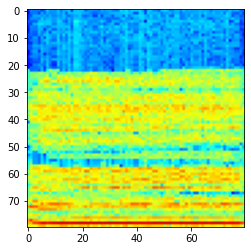

In [53]:
#converting the list to numpy array and saving it to a file using #numpy.save
np.save(os.path.join(path,'features'),np.array(training_data))

#loading the saved file once again
saved = np.load(os.path.join(path,'features.npy'))

# plot the first image
plt.imshow(saved[0].reshape(80,80,3))
# Alternative code, same result:
#plt.imshow(np.array(training_data[0]).reshape(80,80,3))